In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/lambardaar/Desktop/skill-practice-lab/python/CA/Bank_Churn.csv")
df=df.drop(['CustomerId', 'Surname'],axis=1)

ENCODING

In [43]:
le_geo = LabelEncoder()
le_gen = LabelEncoder()
df['Gender'] = le_gen.fit_transform(df['Gender'])
df['Geography'] = le_geo.fit_transform(df['Geography'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


FEATURE SELECTION , SCALING , SPLITING

In [58]:
df['Balance']=df['Balance'].replace(0,df['Balance'].mean())

X=df.drop('Exited',axis=1)
y=df['Exited']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


FINDING BEST VALUE OF K 

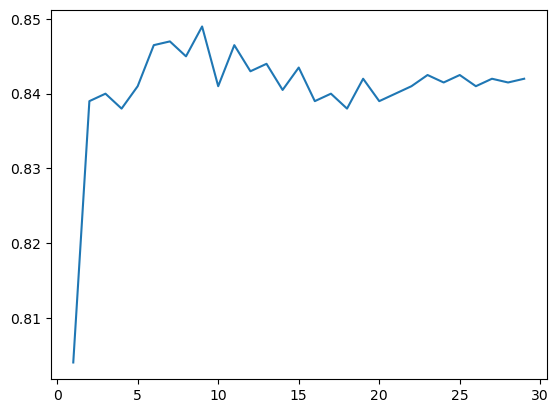

In [ ]:
scores=[]
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,20),scores)



TRAINING AND PREDECTION

In [60]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)



CHECKING PERFORMANCE OF MODEL


accuracy: 
 0.849
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1607
           1       0.72      0.38      0.50       393

    accuracy                           0.85      2000
   macro avg       0.79      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000



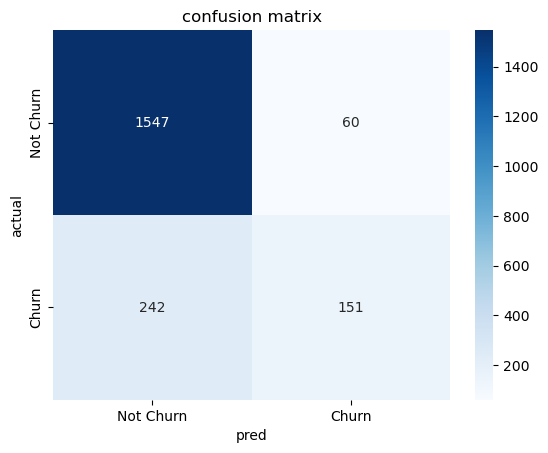

In [65]:
print("\naccuracy: \n",accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel("pred")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

In [48]:
def predict_user(credit_score, geography, gender, age, tenure, balance,
                 num_products, has_card, is_active, salary):

    geo_enc = le_geo.transform([geography])[0] 
    gen_enc = le_gen.transform([gender])[0] 

    user_df = pd.DataFrame([[
        credit_score, geo_enc, gen_enc, age, tenure, balance,
        num_products, has_card, is_active, salary
    ]], columns=X.columns)

    user_scaled = scaler.transform(user_df)

    pred = knn.predict(user_scaled)[0]

    return "Churn" if pred == 1 else "Not Churn"


In [49]:
predict_user(619, "France", "Female", 42, 2, 0.00, 1, 1, 1, 101348.88)


'Not Churn'

In [50]:
predict_user(600, "Germany", "Male", 50, 5, 150000, 1, 1, 0, 120000)


'Churn'

In [51]:
# joblib.dump(knn, "knn.pkl")
# joblib.dump(scaler, "knn_scaler.pkl")
# joblib.dump(le_gen, "le_gen.pkl")
# joblib.dump(le_geo, "le_geo.pkl")
